# seaborn plotting

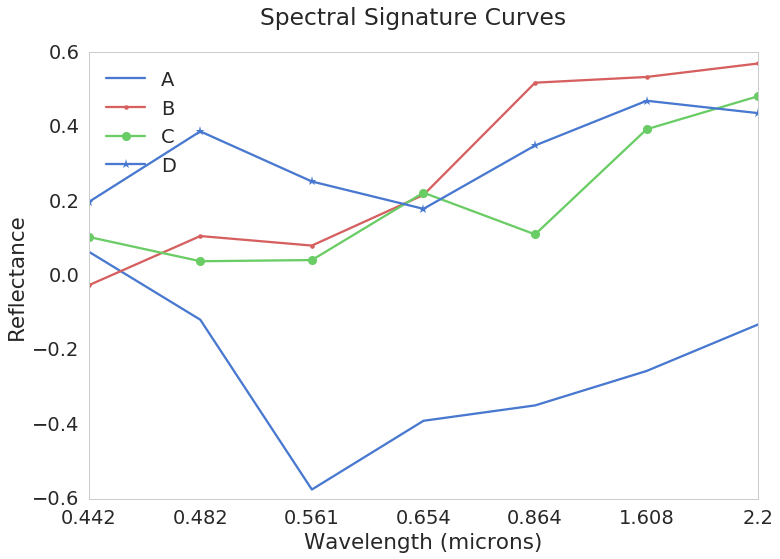

In [37]:
from pdata import *
# Spectral Signature Curves plotting
marker = itertools.cycle(('b-', 'r.-', 'go-', '*-')) 

with sns.axes_style("whitegrid",{'axes.grid': False}):
    f, ax = subplots(figsize=(12, 8))
    sns.set_context("talk", font_scale=1.5)
    df = pd.DataFrame(np.random.randn(7, 4)/8, columns=list('ABCD')).cumsum()
    for k in df:
        ax.plot(df.index, df[k], next(marker))
    xticks(range(7), list('0.442;0.482;0.561;0.654;0.864;1.608;2.2'.split(';')))
    ylabel('Reflectance')
    xlabel('Wavelength (microns)')
    suptitle('Spectral Signature Curves')
    legend(loc='upper left')
    show()

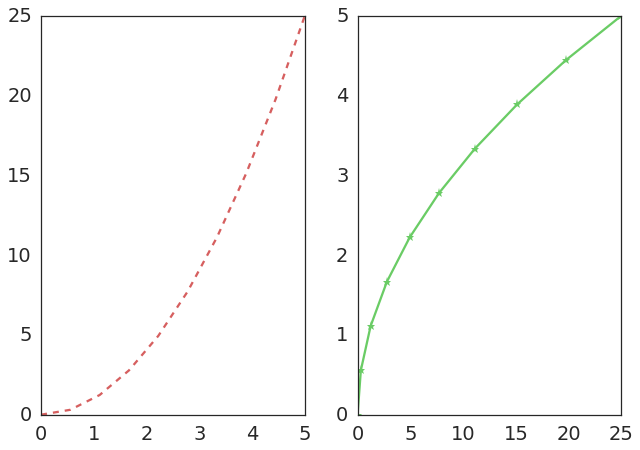

In [19]:
x = np.linspace(0, 5, 10)
y = x ** 2
subplot(1,2,1)
plot(x, y, 'r--')
subplot(1,2,2)
plot(y, x, 'g*-')
show()

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


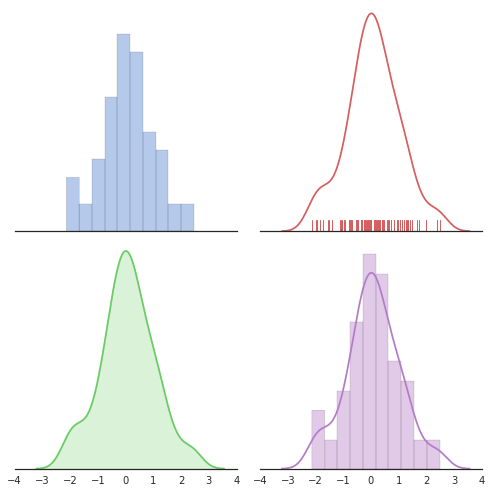

In [2]:
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a historgram and kernel density estimate
sns.distplot(d, color="m", ax=axes[1, 1])

setp(axes, yticks=[])
tight_layout()

# Data
## Export sentinel landsat stack

In [5]:
fname = "misc/S2L8_list1.txt"
f = [s.split('_')[-1].rstrip('.tif') for s in list(open(fname).read().split())]
print(f)


['N00E06', 'N00E09', 'N00E10', 'N00E11', 'N00E12', 'N00E13', 'N00E14', 'N00E15', 'N00E16', 'N00E17', 'N00E18', 'N00E19', 'N00E20', 'N00E34', 'N00E35', 'N00E36', 'N00E37', 'N00E38', 'N00E41', 'N00E42', 'N00E43', 'N01E07', 'N01E09', 'N01E10', 'N01E11', 'N01E12', 'N01E13', 'N01E14', 'N01E15', 'N01E16', 'N01E17', 'N01E18', 'N01E19', 'N01E20', 'N01E21', 'N02E09', 'N02E10', 'N02E11', 'N02E12', 'N02E13', 'N02E14', 'N02E15', 'N02E18', 'N02E19', 'N02E20', 'N02E21', 'N03E08', 'N03E09', 'N03E10', 'N03E11', 'N03E12', 'N03E13', 'N03E15', 'N03E16', 'N03E17', 'N03E18', 'N03E19', 'N03E20', 'N03E21', 'N04E05', 'N04E06', 'N04E07', 'N04E08', 'N04E09', 'N04E10', 'N04E11', 'N04E12', 'N04E13', 'N04E14', 'N04E15', 'N04E16', 'N04E17', 'N04E18', 'N04E19', 'N04E20', 'N04E21', 'N04W02', 'N04W03', 'N04W06', 'N04W07', 'N04W08', 'N04W09', 'N04W10', 'N05E00', 'N05E01', 'N05E04', 'N05E05', 'N05E06', 'N05E07', 'N05E08', 'N05E09', 'N05E10', 'N05E11', 'N05E12', 'N05E13', 'N05E14', 'N05E15', 'N05E19', 'N05E20', 'N05E21',

In [7]:
# import json, ee; ee.Initialize()
# grid1x1 = ee.FeatureCollection('ft:1-M2bqBc_0mEo10VmITae6hAAfd5Zs-Y_rd6YPeIJ') #// ce_grid1x1

from pdata import *
grid1x1 = load_ft('grid')
grid1x1 = grid1x1.toList(grid1x1.size())

start1, end1, start2, end2  = '2016-3-1', '2016-5-31', '2015-9-1', '2015-11-30'
# sentinel 
sentinel_cloud = lambda img: img.updateMask(img.select('QA60').lt(1024)).float()
sentinel1 = ee.ImageCollection("COPERNICUS/S2").filterDate(start1, end1).map(sentinel_cloud).select(['B8','B4','B3','B2'], ['B5','B4','B3','B2'])
sentinel_compose_1 = sentinel1.median().multiply(1e-4)

sentinel2 = ee.ImageCollection("COPERNICUS/S2") \
.filterDate(start2, end2) \
.map(sentinel_cloud) \
.select(['B8','B4','B3','B2'], ['B5','B4','B3','B2'])
sentinel_compose_2 = sentinel2.median().multiply(1e-4)

# landsat
landsat_mask = lambda img: img.updateMask(ee.Algorithms.Landsat.simpleCloudScore(img).select('cloud').lt(40)).float()
s1a, e1a, s1b, e1b, s1c, e1c = '2013-3-01','2013-5-30','2014-3-01','2014-5-30','2015-3-01','2015-5-30'
s2a, e2a, s2b, e2b, s2c, e2c = '2013-9-01','2013-11-30','2014-9-01','2014-11-30','2015-9-01','2015-11-30'

landsat1 = ee.ImageCollection('LANDSAT/LC8_L1T_TOA')\
.filter(ee.Filter.Or(ee.Filter.date(s1a,e1a), ee.Filter.date(s1b,e1b), ee.Filter.date(s1c,e1c)))\
.map(landsat_mask).select(['B5','B4','B3','B2'])
landsat_compose_1 = landsat1.median();

landsat2 = ee.ImageCollection('LANDSAT/LC8_L1T_TOA')\
.filter(ee.Filter.Or(ee.Filter.date(s2a,e2a), ee.Filter.date(s2b,e2b), ee.Filter.date(s2c,e2c)))\
.map(landsat_mask).select(['B5','B4','B3','B2'])
landsat_compose_2 = landsat2.median()

fuse = landsat_compose_1.where(sentinel_compose_1.mask(),sentinel_compose_1)
fuse = fuse.select(['B5','B4','B3','B2'], ['A5','A4','A3','A2']) \
.addBands(landsat_compose_2.where(sentinel_compose_2.mask(),sentinel_compose_2))

fname = "misc/S2L8_list1.txt"
flist = [s.split('_')[-1].rstrip('.tif') for s in list(open(fname).read().split())]
# print(len(flist))
for i in range(0, grid1x1.size().getInfo()): 
    sid = ee.Feature(grid1x1.get(i)).get('id').getInfo()
#     print(sid)
#     if sid in flist: continue
#     print('go')
#     break
    oname = 'S2L8_30m_s_%s' % sid
#     print(oname)
#     break
    unit = ee.Feature(grid1x1.get(i)).geometry()    
    grid = unit.buffer(50, None, None).bounds()      
    task = ee.batch.Export.image.toDrive(**{
        'image': fuse.multiply(1e4).int16(), 
        'description': oname,
        'folder':'S2L8_30m2',
        'region': json.dumps(grid.getInfo()['coordinates']),
        'scale': 30, 
        'maxPixels': 1e13})
    task.start()    
#     break

## Export historical landsat stack

In [ ]:
# export 2010 season 2 stack
import ee; ee.Initialize()
grid1x1 = ee.FeatureCollection('ft:1qu9aO4eywpOteqMAlb4dgPBMhCFivY9PsSbwct1_')
grid1x1 = grid1x1.toList(grid1x1.size())
# landsat
landsat_mask = lambda img: img.updateMask(ee.Algorithms.Landsat.simpleCloudScore(img).select('cloud').lt(40)).float()
y1, y2, y3 = 2009, 2010, 2011
s1a, e1a, s1b, e1b, s1c, e1c = '%d-3-01' % y1,'%d-5-30' % y1,'%d-3-01' % y2,'%d-5-30' % y2,'%d-3-01' % y3,'%d-5-30' % y3
s2a, e2a, s2b, e2b, s2c, e2c = '%d-9-01' % y1,'%d-11-30' % y1,'%d-9-01' % y2,'%d-11-30' % y2,'%d-9-01' % y3,'%d-11-30' % y3

l5 = ee.ImageCollection('LT5_L1T_TOA')
  // .map(getCloudScore)
  // .map(defringeLandsat)
.select(SENSOR_BANDS.get('L5'), SENSOR_BANDS.get('std'));
l7 = ee.ImageCollection('LE7_L1T_TOA')
  // .map(getCloudScore)
  .select(SENSOR_BANDS.get('L7'), SENSOR_BANDS.get('std'));       


landsat1 = ee.ImageCollection('LANDSAT/LC8_L1T_TOA')\
.filter(ee.Filter.Or(ee.Filter.date(s1a,e1a), ee.Filter.date(s1b,e1b), ee.Filter.date(s1c,e1c)))\
.map(landsat_mask).select(['B5','B4','B3','B2'])
landsat_compose_1 = landsat1.median();

landsat2 = ee.ImageCollection('LANDSAT/LC8_L1T_TOA')\
.filter(ee.Filter.Or(ee.Filter.date(s2a,e2a), ee.Filter.date(s2b,e2b), ee.Filter.date(s2c,e2c)))\
.map(landsat_mask).select(['B5','B4','B3','B2'])
landsat_compose_2 = landsat2.median()

fuse = landsat_compose_1.where(sentinel_compose_1.mask(),sentinel_compose_1)
fuse = fuse.select(['B5','B4','B3','B2'], ['A5','A4','A3','A2']) \
.addBands(landsat_compose_2.where(sentinel_compose_2.mask(),sentinel_compose_2))

for i in range(0, grid1x1.size().getInfo()):
    unit = ee.Feature(grid1x1.get(i)).geometry()    
    grid = unit.buffer(50, None, None).bounds()  
    oname = 'S2_S2B8_%02dx%02d_30m' % (unit.getInfo()['coordinates'][0][0][0], unit.getInfo()['coordinates'][0][0][1])    
    grid = json.dumps(grid.getInfo()['coordinates'])    
    task = ee.batch.Export.image.toDrive(**{
        'image': fuse.multiply(1e4).int16(), 
        'description': oname,
        'folder':'nosync',
        'region': grid,
        'scale': 30, 
        'maxPixels': 1e13})
    task.start()

## Postprocess segmentation and classification

In [ ]:
# loop for ImageCollection from segmentation set
# Reduce Mean Value based on Classified
# Export to an ee.Image (GCPA30L1v2_N30E40), add meta, id:N30E40,  LAT: 30   LAT 40
# Push to an ee.ImageCollection (users/JunXiong1981/merged_30m_cropextent) on Jun's asset
classified = ee.Image('users/JunXiong1981/africa_30m_extent_v201605_y2014')
segment_collection = ee.ImageCollection('users/JunXiong1981/rhseg_footprint/segmentation_test')
segment_list = segment_collection.toList(segment_collection.size())

adjusted_mean = lambda f: f.set('adjusted_mean', ee.Number(f.get('mean')).multiply(100))
for i in range(0, segment_list.size().getInfo()):
    segmentation = ee.Image(segment_list.get(i))
    seg_mask_poly = segmentation.reduceToVectors(**{
        'reducer': ee.Reducer.countEvery(),    
        'geometry': segmentation.geometry(),
        'scale': 30,
        'geometryType': "polygon",
        'maxPixels': 1e13,
        'tileScale': 4})
 
    # extract mean of NDVI mask for each segment
    map_value = classified.reduceRegions(**{
        'collection': seg_mask_poly,
        'reducer': ee.Reducer.mean(),
        'scale': 30}).map(adjusted_mean)
    merge = ee.Image().toByte().paint(map_value, 'adjusted_mean')    
#     Export.image.toAsset(image, description, assetId, pyramidingPolicy, dimensions, region, scale, crs, crsTransform, maxPixels)
    task = ee.batch.Export.image.toAsset(**{
        'image': merge.byte(), 
        'description': 'merge_test_%0d' % i,
        'assetId': 'users/JunXiong1981/merged_30m_cropextent/merge_test_%0d' % i,
#         'region': segmentation.geometry(),
        'scale': 30, 
        'maxPixels': 1e13})
    task.start()

## create grid kml file 
[script](https://code.earthengine.google.com/7f9bc48603fdc63cff1d4872a8d356c8)

In [9]:
# create grid kml file
head = """<?xml version="1.0" encoding="UTF-8"?>
<kml xmlns="http://www.opengis.net/kml/2.2">
<Document>
"""
tail = """
</Document>
</kml>
"""

place = """
<Placemark>
  <ExtendedData>
    <Data name='id'>
      <value>%s</value>
    </Data>    
  </ExtendedData>
  <Polygon>
    <outerBoundaryIs>
      <LinearRing>
        <coordinates>%f,%f %f,%f %f,%f %f,%f %f,%f </coordinates>
      </LinearRing>
    </outerBoundaryIs>
  </Polygon>
</Placemark>"""
with open('workfile.kml', 'w') as f:
    f.write(head)
    for lon in range(-28, 65):
        for lat in range(-48,38):
            p1 = 'N' if lat>=0 else 'S'
            p2 = 'E' if lon>=0 else 'W'
            id = '%s%02d%s%02d' % (p1, abs(lat), p2, abs(lon))
            print(id)
            x2, y2, x3, y3, x4, y4 = lon+1, lat, lon+1, lat+1, lon, lat+1 
            f.write(place % (id, lon, lat, x2, y2, x3, y3, x4, y4, lon, lat))
    f.write(tail)


S48W28
S47W28
S46W28
S45W28
S44W28
S43W28
S42W28
S41W28
S40W28
S39W28
S38W28
S37W28
S36W28
S35W28
S34W28
S33W28
S32W28
S31W28
S30W28
S29W28
S28W28
S27W28
S26W28
S25W28
S24W28
S23W28
S22W28
S21W28
S20W28
S19W28
S18W28
S17W28
S16W28
S15W28
S14W28
S13W28
S12W28
S11W28
S10W28
S09W28
S08W28
S07W28
S06W28
S05W28
S04W28
S03W28
S02W28
S01W28
N00W28
N01W28
N02W28
N03W28
N04W28
N05W28
N06W28
N07W28
N08W28
N09W28
N10W28
N11W28
N12W28
N13W28
N14W28
N15W28
N16W28
N17W28
N18W28
N19W28
N20W28
N21W28
N22W28
N23W28
N24W28
N25W28
N26W28
N27W28
N28W28
N29W28
N30W28
N31W28
N32W28
N33W28
N34W28
N35W28
N36W28
N37W28
S48W27
S47W27
S46W27
S45W27
S44W27
S43W27
S42W27
S41W27
S40W27
S39W27
S38W27
S37W27
S36W27
S35W27
S34W27
S33W27
S32W27
S31W27
S30W27
S29W27
S28W27
S27W27
S26W27
S25W27
S24W27
S23W27
S22W27
S21W27
S20W27
S19W27
S18W27
S17W27
S16W27
S15W27
S14W27
S13W27
S12W27
S11W27
S10W27
S09W27
S08W27
S07W27
S06W27
S05W27
S04W27
S03W27
S02W27
S01W27
N00W27
N01W27
N02W27
N03W27
N04W27
N05W27
N06W27
N07W27
N08W27

# Historical Classification

# Results

## training examples 

In [ ]:
%matplotlib inline
import ee; ee.Initialize()
from IPython.display import Image
# Create a reference to the image collection
l8 = ee.ImageCollection('LANDSAT/LC8_L1T_TOA')
# Filter the collection down to a two week period
filtered = l8.filterDate('2013-05-01', '2013-05-15');
# Use the mosaic reducer, to select the most recent pixel in areas of overlap
l8_image = filtered.mosaic()
# Define a region roughly covering California
point = ee.Geometry.Point(-118, 37)
region_california = point.buffer(500000).bounds().getInfo()['coordinates']
# And finally display the image.
a = Image(url=l8_image.getThumbUrl({'region':region_california}))


import matplotlib.pyplot as plt
import urllib.request
from io import BytesIO
data = BytesIO(urllib.request.urlopen(l8_image.getThumbUrl({'region':region_california})).read())

# create a file-like object from the url
# f=urllib2.urlopen(l8_image.getThumbUrl({'region':region_california}))

# read the image file in a numpy array
image = plt.imread(data)  # crash on py3.x
ax = plt.imshow(image)
ax.set_cmap('hot')
plt.axis('off')
plt.annotate('Label A',xy=(81,130),xytext=(150,200),arrowprops=dict(facecolor='red'))

# Plotting

In [ ]:
%matplotlib inline
from pdata import *


# Analysis
## Comparison between different classifier [script](https://code.earthengine.google.com/f767e39845376321bef86f801962c011)

## Comparison between other datasets

In [ ]:
%matplotlib inline
import ee; ee.Initialize()
from IPython.display import Image
import matplotlib.pyplot as plt
import urllib.request
from io import BytesIO

# fromgc, glc30
# type = 'Barren.Builtup.Cropland.Forest.Grassland.Shrubs.Water'.split()
sites = ee.FeatureCollection('ft:1C_gFvQmd3AGtB0Q0XgnKk5ESUARSH79FB9Un8sF2').filter(ee.Filter.neq('land_cover', 'Unknown'));

# l8 = ee.ImageCollection('LANDSAT/LC8_L1T_TOA')
# filtered = l8.filterDate('2013-09-01', '2013-11-15');
# l8_image = filtered.mosaic()

landsat_mask = lambda img: img.updateMask(ee.Algorithms.Landsat.simpleCloudScore(img).select('cloud').lt(40)).float()
landsat = ee.ImageCollection('LANDSAT/LC8_L1T_TOA')
s2a, e2a, s2b, e2b, s2c, e2c = '2013-9-01','2013-11-30','2014-9-01','2014-11-30','2015-9-01','2015-11-30'
landsat2 = ee.ImageCollection('LANDSAT/LC8_L1T_TOA')\
.filter(ee.Filter.Or(ee.Filter.date(s2a,e2a), ee.Filter.date(s2b,e2b), ee.Filter.date(s2c,e2c)))\
.map(landsat_mask)

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }
for i in range(0, s1.size().getInfo()):
    point = ee.Feature(s1.get(i))
    label = point.get('land_cover').getInfo()
    pid = point.get('id').getInfo()
    oname = 'output/sample_%s_%s.png' % (label, pid)
#     print(oname)    
#     break
    region = point.geometry().buffer(5000).bounds().getInfo()['coordinates']
    data = BytesIO(urllib.request.urlopen(l8_image.getThumbUrl({'region':region, 'bands': 'B5,B4,B3', 'min':0, 'max': 0.5, 'format':'png'})).read())
    
    image = plt.imread(data)    
    fig = plt.figure()
    fig.set_size_inches(2, 2)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)    
    ax.imshow(image, aspect = 'auto')
    plt.text(2, 30, label, fontdict=font)
#     plt.text(2, 64, r'$\cos(2 \pi t) \exp(-t)$', fontdict=font)
    plt.savefig(oname, dpi = 300)
#     break